Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [354]:
NAME = "Farnaz Ghodousipour"

# Assignment 3 - Predictive Modelling with Linear Regression

In this assignment, we will be building a predictive linear regression model using Python's sklearn library.

We will use the NBA player statistics data set to see which features can be used to predict season performance. You can use the .csv file provided, and the data dictionary is below:

- GP     Games Played
- MIN    Minutes Played
- PTS    Points
- FGM    Field Goals Made
- FGA    Field Goals Attempted
- FG%    Field Goal Percentage
- 3PM    3 Point Field Goals Made
- 3PA    3 Point Field Goals Attempted
- 3P%    3 Point Field Goals Percentage
- FTM    Free Throws Made
- FTA    Free Throws Attempted
- FT%    Free Throw Percentage
- OREB   Offensive Rebounds
- DREB   Defensive Rebounds
- REB    Rebounds
- AST    Assists
- STL    Steals
- BLK    Blocks
- TOV    Turnovers
- EFF    Efficiency

Answer the following questions:

**Question 1** _(5 points)_
* Import the dataset and prepare it for analysis. Describe your approach and Python methods used.

**Question 2** _(5 points)_
* Identify your dependent variable that your model will seek to predict. Conduct exploratory analysis by identify trends and relationships that may exist between the independent variables and your dependent variable. Develop your hypothesis and state it in mathematical terms (i.e. $H_0 and H_1$).

**Question 3** _(5 points)_
* Build a linear regression using the the independent variables that support your hypothesis. Interpret and describe the results.

**Question 4** _(5 points)_
* Split your data set into train and test data and convert your variables to NumPy arrays.

**Question 5** _(10 points)_
* Build a predictive model using the sklearn library. Test your model and evaluate the accuracy using the MSE / RMSE method.

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from sklearn.preprocessing import PowerTransformer
import sklearn


In [356]:
df=pd.read_csv('players_stats.csv', header=0, sep=',')

In [357]:
df.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          490 non-null    object 
 1   Games Played  490 non-null    int64  
 2   MIN           490 non-null    int64  
 3   PTS           490 non-null    int64  
 4   FGM           490 non-null    int64  
 5   FGA           490 non-null    int64  
 6   FG%           490 non-null    float64
 7   3PM           490 non-null    int64  
 8   3PA           490 non-null    int64  
 9   3P%           490 non-null    float64
 10  FTM           490 non-null    int64  
 11  FTA           490 non-null    int64  
 12  FT%           490 non-null    float64
 13  OREB          490 non-null    int64  
 14  DREB          490 non-null    int64  
 15  REB           490 non-null    int64  
 16  AST           490 non-null    int64  
 17  STL           490 non-null    int64  
 18  BLK           490 non-null    

to see if there is any missing data using isnull 

In [359]:
df.isnull().values.any()

True

In [360]:
df.isnull().sum()

Name              0
Games Played      0
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
OREB              0
DREB              0
REB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
EFF               0
AST/TOV           0
STL/TOV           0
Age              68
Birth_Place      68
Birthdate        68
Collage         140
Experience       68
Height           68
Pos              68
Team             68
Weight           68
BMI              68
dtype: int64

replacing null from Column Age and Height and weight with median using median and fillna functions

In [361]:
df['Age'].median()

27.0

In [362]:
df['Age']=df['Age'].fillna(value='27')

In [363]:
df['Age'].unique()

array([29.0, 30.0, 20.0, 24.0, 33.0, 22.0, 27.0, 25.0, 23.0, 28.0, '27',
       31.0, 39.0, 34.0, 26.0, 21.0, 32.0, 36.0, 35.0, 37.0, 38.0],
      dtype=object)

In [364]:
df['Height'].median()

197.5

In [365]:
df['Height']=df['Height'].fillna(value='197.5')

In [366]:
df['Weight'].median()

99.0

In [367]:
df['Weight']=df['Weight'].fillna(value='99')

dropping collage column since there there is lots of null items and it is not included in my model using function drop

In [368]:
df=df.drop(['Collage'], axis=1)

In [369]:
df2=df.dropna().copy()

In [370]:
df2.isnull().sum()

Name            0
Games Played    0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3PM             0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
EFF             0
AST/TOV         0
STL/TOV         0
Age             0
Birth_Place     0
Birthdate       0
Experience      0
Height          0
Pos             0
Team            0
Weight          0
BMI             0
dtype: int64

Since we are predicting future performances we need to eliminate the retired players from our data and then converting Experience to numeric using pd.to_numeric

In [371]:
df2 = df2[df2.Experience != 'R'].copy()
df2['Experience'] = df2['Experience'].apply(pd.to_numeric)

In [372]:
df2['Experience'].value_counts()

1     56
2     46
5     35
3     32
4     31
6     30
7     24
11    19
9     18
10    16
8     15
12    13
13     6
16     4
14     3
15     3
18     1
17     1
19     1
Name: Experience, dtype: int64

to add all the items that have possitive impact on a player's result using loc function

In [373]:
df2.loc[:,'add'] = df2['PTS'] + df2['REB'] + df2['AST'] + df2['STL'] + df2['BLK']

to define the total negative impact

In [374]:
df2.loc[:,'subtract'] =(df2['FGA'] - df2 ['FGM'])+(df2['FTA'] - df2['FTM']) + df2['TOV']

to eliminate the space from the name of columns using rename function

In [375]:
df2.rename(columns={'Games Played':'Games_Played'}, inplace=True)

assigning dummy variables to the pos and team columns

In [376]:
Pos_dummies = pd.get_dummies(df2['Pos'])

In [377]:
Pos_dummies.head()

,C,PF,PG,SF,SG
0,0,0,1,0,0
1,0,0,1,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,0,0,0,0,1


In [378]:
Team_dummies = pd.get_dummies(df2['Team'])

In [379]:
Team_dummies.head()

,ATL,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check the linear relation between some of the items that I tested 

In [380]:
Data=['MIN','Games_Played','add','Experience']

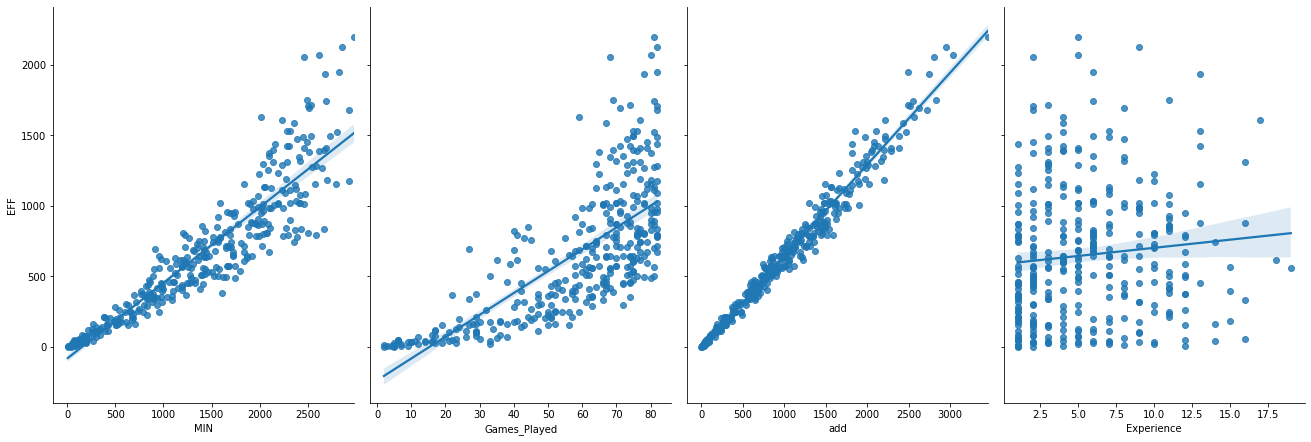

In [381]:
sns.pairplot(df2, x_vars=Data, y_vars=['EFF'], kind='reg', height=6,aspect=0.75)

I eliminate the Experience from my model since I don't see linear relation 

# Hypothesis


Dependent variable:EFF
(independent variable#1:MIN
Hypothesis: H0:change of MIN has no signifivant change in EFF
            H1:EFF increases by change of MIN)
(independent variable#2:PTS
            H0:change of PTS has no signifivant change in EFF
            H1:EFF increases by change of PTS)
(independent variable#3:Height
            H0:change of PTS has no signifivant change in EFF
            H1:EFF increases by change of PTS)
(independent variable#4:Games_played
            H0:change of the number of Games has no signifivant change in EFF
            H1:EFF increases by change of the number o games has been played ?)   
(independent variable#5:Age
            H0:change of Age has no signifivant change in EFF
            H1:EFF increases by change of Age)
(independent variable#6:add
            H0:change of add (positive effects) has no signifivant change in EFF
            H1:EFF increases by change of add0            

Building regression model by testing different columns to get better results

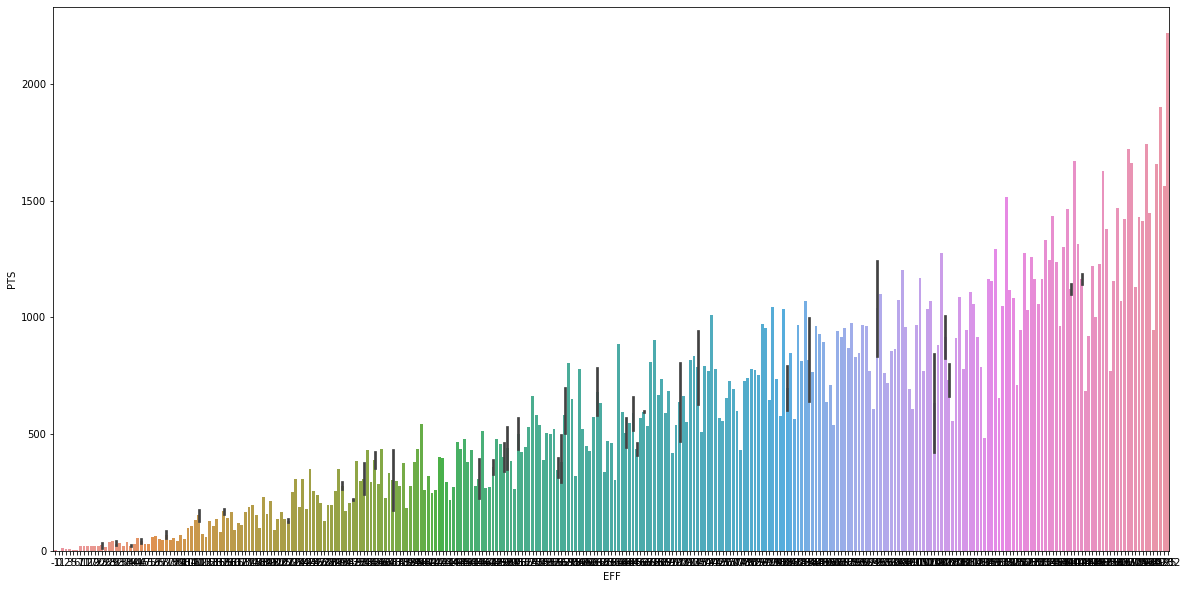

In [382]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x='EFF',y='PTS', data=df2, ax=ax)

As we can see the linear relationship is  good between MIN,Game_Played and Add but not in Experience so we can eliminate that from our model

In [383]:
results1=ols("EFF ~ MIN + PTS + Height",df2).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    EFF   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     241.0
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          2.03e-179
Time:                        20:27:56   Log-Likelihood:                -2212.9
No. Observations:                 354   AIC:                             4464.
Df Residuals:                     335   BIC:                             4537.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -137.4146    130.310     

In [384]:
results2=ols("EFF ~ MIN + PTS ",df2).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    EFF   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1475.
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          1.48e-171
Time:                        20:27:56   Log-Likelihood:                -2282.7
No. Observations:                 354   AIC:                             4571.
Df Residuals:                     351   BIC:                             4583.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2445     16.838     -1.440      0.1

In [385]:
results3=ols('EFF ~ MIN + Games_Played + add + Height + Age', df2).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                    EFF   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     492.3
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          1.66e-256
Time:                        20:27:56   Log-Likelihood:                -1958.7
No. Observations:                 354   AIC:                             3993.
Df Residuals:                     316   BIC:                             4141.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -107.9478     81.639     

In [386]:
results4=ols('EFF ~ MIN + Games_Played + add ', df2).fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                    EFF   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4776.
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          1.65e-283
Time:                        20:27:57   Log-Likelihood:                -2018.1
No. Observations:                 354   AIC:                             4044.
Df Residuals:                     350   BIC:                             4060.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.6203     11.484     -2.405   

R-squared and Adj are the same and high, F is high so overall this is a god model.

to pull a summary of all plots and see if the model is good I used plot_regress_exog .

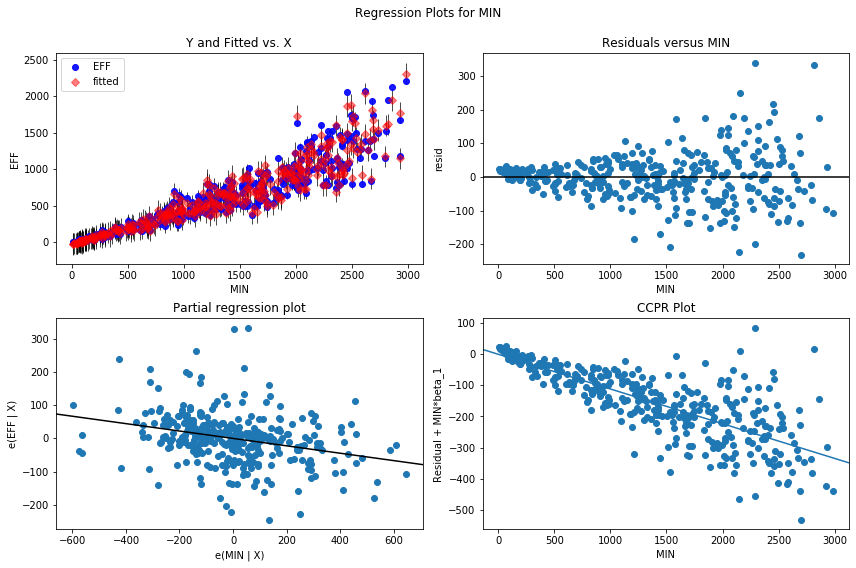

In [387]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results4, "MIN", fig=fig)

As we can see there is a linear trend which is what we were looking for. So we consider result4 as the best model so far.

finding the predictive model using sklearn:

In [388]:
Y = df2["EFF"]
X =df2[["MIN","Games_Played", "add"]].values.reshape(-1,3)
results5 = sklearn.linear_model.LinearRegression().fit(X, Y)
m=results5.coef_
b=results5.intercept_
print(m)
print(b)

[-0.11161896  1.25643174  0.74337487]
-27.620251329412554


In [389]:
print(' y = {0} x + {1} x + {2} x + {3} '.format(m[0],m[1],m[2], b))

 y = -0.11161896380876746 x + 1.2564317402279672 x + 0.7433748654551355 x + -27.620251329412554 


building a predictive model and the train-test dataset by 70% & 30% train &test 

In [390]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [391]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

applying a linear regression model to our training dataset

In [392]:
train_model = sklearn.linear_model.LinearRegression().fit(X_train, Y_train)

In [393]:
print(train_model.coef_)
print(train_model.intercept_)

[-0.11018552  1.17338086  0.74416486]
-26.11284060046023


using predict function to make predictions

In [394]:
predict = train_model.predict(X_test)

calculating RMSE and R2

In [395]:
test_rmse = (np.sqrt(mean_squared_error(Y_test, predict)))
test_r2 = r2_score(Y_test, predict)
print(test_rmse) #the lower the value, the better the fit
print(test_r2) #the closer to 1, the better the fit

69.34744861077759
0.9802655533396798


making a data frame with predicted values and compare them with the actual ones

In [396]:
df3 = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})  
df3

,Actual,Predicted
363,37,18.959479
305,946,1077.216463
26,175,201.767213
403,319,307.571071
306,645,731.409392
...,...,...
239,708,664.337378
64,492,468.516686
254,450,430.194716
73,20,3.408556


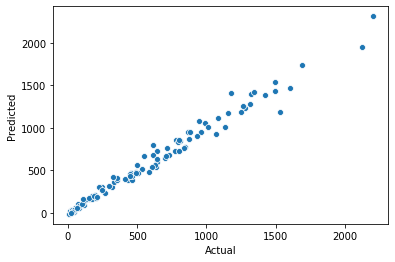

In [397]:
sns.scatterplot(x=df3['Actual'], y=df3['Predicted'])

Overall this is a good model for predicting the persormance.